## Project -5 Fraud Detection in Supply chain
Fraud detection in the supply chain is an important area of focus for businesses to safeguard their operations, minimize financial losses, and maintain the integrity of their supply chain processes. Fraud can occur at various stages of the supply chain, including procurement, inventory management, transportation, and distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/HP/OneDrive/Documents/InternshipProjects/Datasets/fraud_detection_dataset.csv",
                   encoding = 'unicode_escape')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
data.shape

(180519, 53)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
data['Total_price']=data['Order Item Quantity']*data['Order Item Total']

In [6]:
data['order_yr']= pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).weekday
data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour

In [7]:
data.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [8]:
df = data.drop(['Sales per customer','Category Id','Customer Email','Customer Fname','Customer Id',
                'Customer Lname','Customer Street','Customer Zipcode','Customer Password','Department Id','Latitude',
                'Longitude','Order Customer Id','order date (DateOrders)','Order Id','Order Item Cardprod Id',
                'Order Item Discount','Order Item Id','Order Item Product Price','Order Item Profit Ratio',
                'Sales','Order Item Total','Order Profit Per Order','Product Status','Product Description','Product Card Id',
                'Product Category Id','Product Image','Order Zipcode','shipping date (DateOrders)'],axis='columns')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,...,Order State,Order Status,Product Name,Product Price,Shipping Mode,Total_price,order_yr,order_month,order_day,order_hour
0,DEBIT,3,4,91.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,...,Java Occidental,COMPLETE,Smart watch,327.75,Standard Class,314.640015,2018,1,2,22
1,TRANSFER,5,4,-249.089996,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,...,Rajastán,PENDING,Smart watch,327.75,Standard Class,311.359985,2018,1,5,12
2,CASH,4,4,-247.779999,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,...,Rajastán,CLOSED,Smart watch,327.75,Standard Class,309.720001,2018,1,5,12
3,DEBIT,3,4,22.860001,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,...,Queensland,COMPLETE,Smart watch,327.75,Standard Class,304.809998,2018,1,5,11
4,PAYMENT,2,4,134.210007,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,...,Queensland,PENDING_PAYMENT,Smart watch,327.75,Standard Class,298.250000,2018,1,5,11


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Delivery Status                180519 non-null  object 
 5   Late_delivery_risk             180519 non-null  int64  
 6   Category Name                  180519 non-null  object 
 7   Customer City                  180519 non-null  object 
 8   Customer Country               180519 non-null  object 
 9   Customer Segment               180519 non-null  object 
 10  Customer State                 180519 non-null  object 
 11  Department Name                180519 non-null  object 
 12  Market                        

In [10]:
num_cols = df.select_dtypes(include = ['float64','int64'])
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.00000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.00000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.97998,7.000000,31.520000,64.800003,911.799988
Late_delivery_risk,180519.0,0.548291,0.497664,0.00000,0.000000,1.000000,1.000000,1.000000
Order Item Discount Rate,180519.0,0.101668,0.070415,0.00000,0.040000,0.100000,0.160000,0.250000
Order Item Quantity,180519.0,2.127638,1.453451,1.00000,1.000000,1.000000,3.000000,5.000000
Product Price,180519.0,141.232550,139.732492,9.99000,50.000000,59.990002,199.990005,1999.989990
Total_price,180519.0,407.978685,418.505725,7.49000,127.389999,263.980011,469.710022,2499.750061
order_yr,180519.0,2015.971150,0.829429,2015.00000,2015.000000,2016.000000,2017.000000,2018.000000
order_month,180519.0,6.235449,3.403571,1.00000,3.000000,6.000000,9.000000,12.000000


In [11]:
cat_cols = df.select_dtypes(include = 'object')
cat_cols.describe().T

,count,unique,top,freq
Type,180519,4,DEBIT,69295
Delivery Status,180519,4,Late delivery,98977
Category Name,180519,50,Cleats,24551
Customer City,180519,563,Caguas,66770
Customer Country,180519,2,EE. UU.,111146
Customer Segment,180519,3,Consumer,93504
Customer State,180519,46,PR,69373
Department Name,180519,11,Fan Shop,66861
Market,180519,5,LATAM,51594
Order City,180519,3597,Santo Domingo,2211


In [12]:
s= df.duplicated()
s

0         False
1         False
2         False
3         False
4         False
          ...  
180514    False
180515    False
180516    False
180517    False
180518    False
Length: 180519, dtype: bool

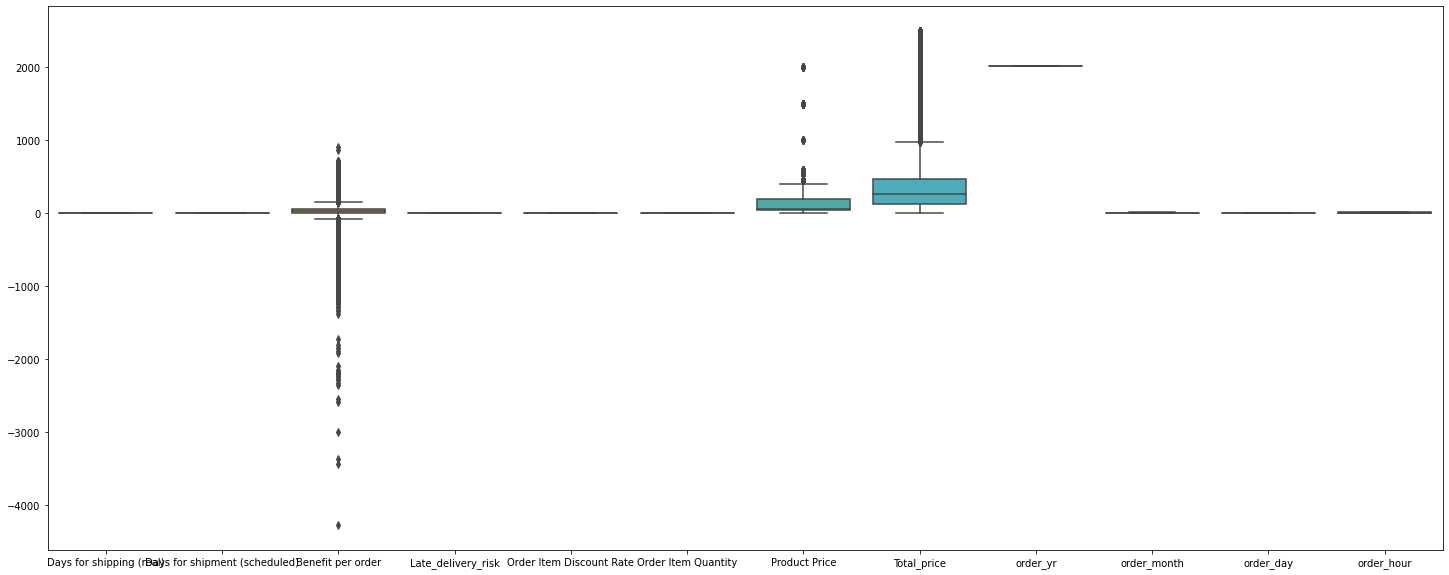

In [13]:
plt.figure(figsize=(25,10))
sns.boxplot(data = num_cols)
plt.show()

In [14]:
from scipy.stats.mstats import winsorize
# handling outliers using winsorize method
for col in df[['Benefit per order','Product Price','Total_price']]:
    df[col] = winsorize(df[col],limits=[0.02,0.05]) 

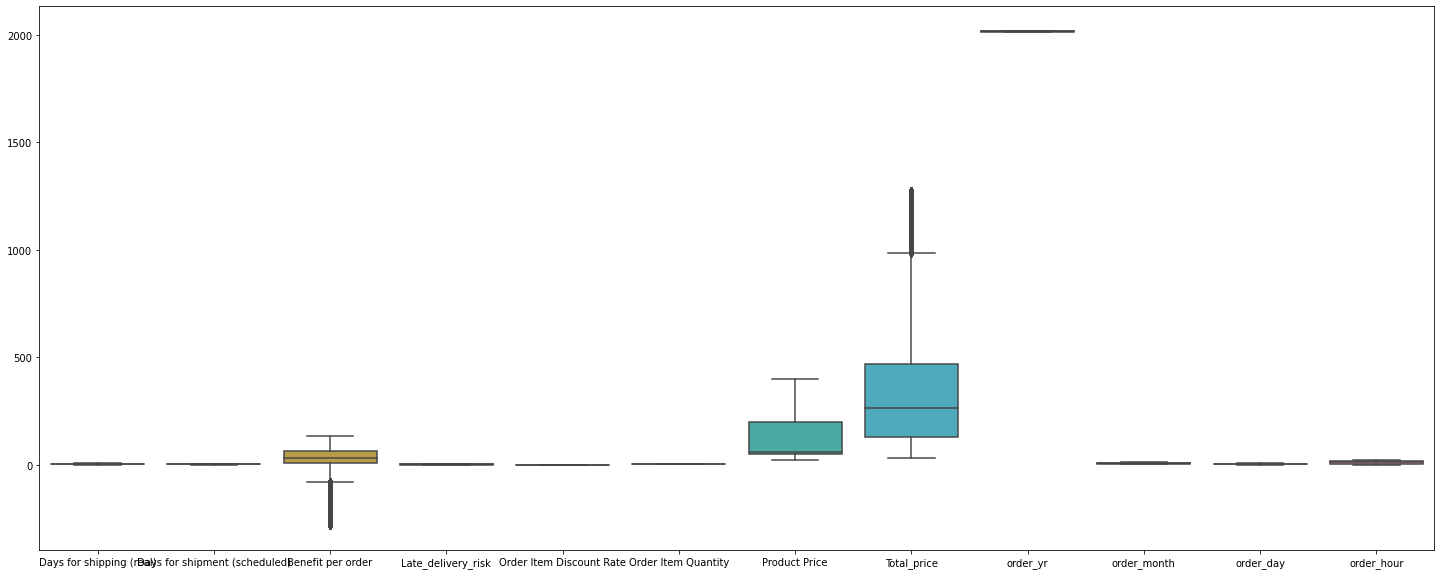

In [15]:
plt.figure(figsize=(25,10))
sns.boxplot(data = df.select_dtypes(exclude=['object']))
plt.show()

In [16]:
df.isnull().values.any()

False

In [17]:
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Delivery Status                  0
Late_delivery_risk               0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Segment                 0
Customer State                   0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Item Discount Rate         0
Order Item Quantity              0
Order Region                     0
Order State                      0
Order Status                     0
Product Name                     0
Product Price                    0
Shipping Mode                    0
Total_price                      0
order_yr                         0
order_month                      0
order_day                        0
order_hour                       0
dtype: int64

df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0)

In [18]:
loss = df[(df['Benefit per order']<0)]

Text(0.5, 1.0, '10 Loss making products')

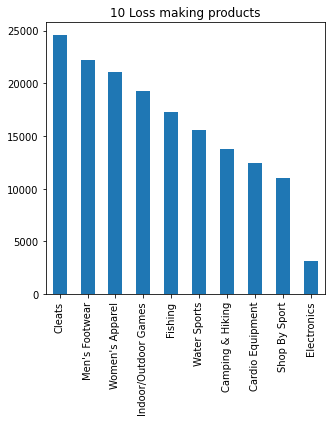

In [19]:
plt.figure(figsize=(5,5))
df['Category Name'].value_counts().nlargest(10).plot(kind='bar')
plt.title("10 Loss making products")

Text(0.5, 1.0, 'Loss making markets')

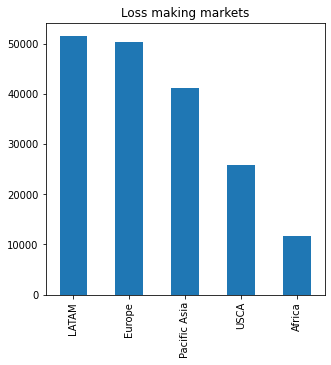

In [20]:
plt.figure(figsize=(5,5))
df['Market'].value_counts().plot(kind='bar')
plt.title("Loss making markets")

In [21]:
status = df.groupby('Type')['Order Status'].value_counts()
status_df = status.to_frame()
status_df

Order Status
Type     Order Status                 
CASH     CLOSED                  19616
DEBIT    COMPLETE                59491
         ON_HOLD                  9804
PAYMENT  PENDING_PAYMENT         39832
         PAYMENT_REVIEW           1893
TRANSFER PROCESSING              21902
         PENDING                 20227
         SUSPECTED_FRAUD          4062
         CANCELED                 3692

In [22]:
fraud_region = df[(df['Order Status'] == 'SUSPECTED_FRAUD')]

In [23]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Delivery Status', 'Late_delivery_risk',
       'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Item Discount Rate',
       'Order Item Quantity', 'Order Region', 'Order State', 'Order Status',
       'Product Name', 'Product Price', 'Shipping Mode', 'Total_price',
       'order_yr', 'order_month', 'order_day', 'order_hour'],
      dtype='object')

Text(0.5, 1.0, 'Products with fraud activity')

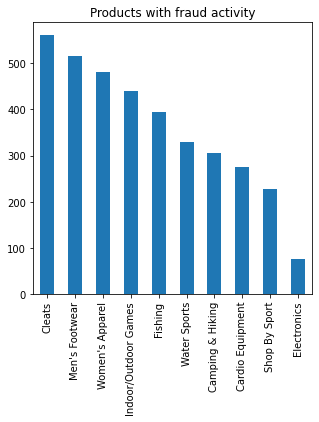

In [24]:
plt.figure(figsize=(5,5))
fraud_region['Category Name'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Products with fraud activity")

In [25]:
df1 = df.copy()

In [26]:
# Creating Binary enocode for Suspected Fraud and Late delivery
df1['late_delivery']=np.where(df1['Delivery Status'] == 'Late delivery', 1, 0).astype('int64')
df1['fraud'] = np.where(df1['Order Status'] == 'SUSPECTED_FRAUD', 1, 0).astype('int64')
df1['fraud'].value_counts()

0    176457
1      4062
Name: fraud, dtype: int64

In [27]:
df1.drop(['Delivery Status','Late_delivery_risk','Order Status','Benefit per order'], axis=1, inplace=True)

In [28]:
df1.shape

(180519, 26)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Category Name                  180519 non-null  object 
 4   Customer City                  180519 non-null  object 
 5   Customer Country               180519 non-null  object 
 6   Customer Segment               180519 non-null  object 
 7   Customer State                 180519 non-null  object 
 8   Department Name                180519 non-null  object 
 9   Market                         180519 non-null  object 
 10  Order City                     180519 non-null  object 
 11  Order Country                  180519 non-null  object 
 12  Order Item Discount Rate      

<AxesSubplot: >

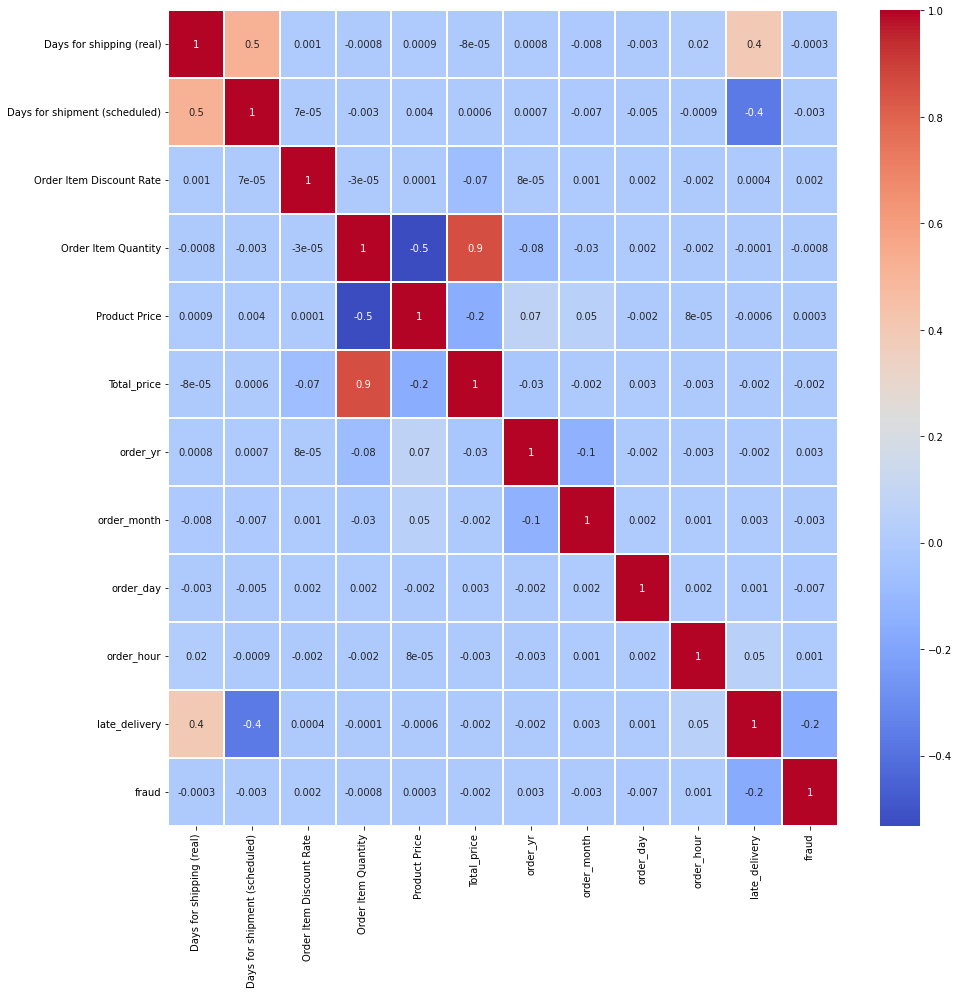

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,linewidths=.3 ,fmt='.1g', cmap= 'coolwarm')

In [31]:
df1.nunique()

Type                                4
Days for shipping (real)            7
Days for shipment (scheduled)       4
Category Name                      50
Customer City                     563
Customer Country                    2
Customer Segment                    3
Customer State                     46
Department Name                    11
Market                              5
Order City                       3597
Order Country                     164
Order Item Discount Rate           18
Order Item Quantity                 5
Order Region                       23
Order State                      1089
Product Name                      118
Product Price                      60
Shipping Mode                       4
Total_price                      2702
order_yr                            4
order_month                        12
order_day                           7
order_hour                         24
late_delivery                       2
fraud                               2
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df1['Type'] = le.fit_transform(df1['Type']).astype('int64')
df1['Category Name'] = le.fit_transform(df1['Category Name']).astype('int64')
df1['Customer City'] = le.fit_transform(df1['Customer City']).astype('int64')
df1['Customer Country'] = le.fit_transform(df1['Customer Country']).astype('int64')
df1['Customer Segment'] = le.fit_transform(df1['Customer Segment']).astype('int64')
df1['Customer State'] = le.fit_transform(df1['Customer State']).astype('int64')
df1['Department Name'] = le.fit_transform(df1['Department Name']).astype('int64')
df1['Market'] = le.fit_transform(df1['Market']).astype('int64')
df1['Order City'] = le.fit_transform(df1['Order City']).astype('int64')
df1['Order Country'] = le.fit_transform(df1['Order Country']).astype('int64')
df1['Order State'] = le.fit_transform(df1['Order State']).astype('int64')
df1['Order Region'] = le.fit_transform(df1['Order Region']).astype('int64')
df1['Product Name'] = le.fit_transform(df1['Product Name']).astype('int64')
df1['Shipping Mode'] = le.fit_transform(df1['Shipping Mode']).astype('int64')

ss = StandardScaler()
df1[['Total_price','Product Price']] = pd.DataFrame(ss.fit_transform(df1[['Total_price','Product Price']]))
df1.head()

In [33]:
## dataset for validation
sample_df = df1.sample(frac=0.01,random_state=1)
sample_df.shape

(1805, 26)

In [34]:
df1 = df1.drop(sample_df.index)
df1.shape

(178714, 26)

In [35]:
## splitting the dataset into train and test spilt
X = df1.loc[:,df1.columns != 'fraud']
y = df1['fraud']

<AxesSubplot: xlabel='fraud', ylabel='count'>

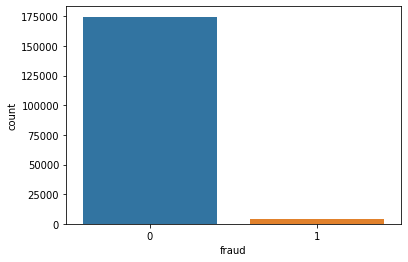

In [36]:
sns.countplot(df1['fraud'],data=df1)

In [38]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 'minority',random_state=42)
X, y = sm.fit_resample(X, y)

# Create a new dataframe with resampled data
df1 = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

# Check the value counts of the target variable after oversampling
print(df1['fraud'].value_counts())


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
sns.countplot(df1['fraud'],data=df1)

from sklearn.decomposition import PCA
pca = PCA(0.95)
X_new = pd.DataFrame(pca.fit_transform(X))
print('shape of X new:',X_new.shape)
print('no.of pca components:',pca.n_components_)
print('explained variance :', pca.explained_variance_ratio_)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3,
                                             random_state = 42)

In [ ]:
Xtrain

#### MLP classifier


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
mlp = MLPClassifier(hidden_layer_sizes=(6), activation='logistic', solver='lbfgs',random_state=1)
mlp.fit(Xtrain,ytrain)

In [ ]:
mlptrain_pred = mlp.predict(Xtrain) 


In [ ]:
mlppred = mlp.predict(Xtest)

In [ ]:
print(confusion_matrix(ytest,mlppred))
print()

In [ ]:
accuracy_score(ytrain,mlptrain_pred)

In [ ]:
accuracy_score(ytest,mlppred)

####  Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(Xtrain,ytrain)

In [ ]:

dtctrain_pred = dtc.predict(Xtrain) 


In [ ]:
dtcpred = dtc.predict(Xtest)


In [ ]:
print(confusion_matrix(ytest,dtcpred))

In [ ]:
accuracy_score(ytrain,dtctrain_pred)

In [ ]:
accuracy_score(ytest,dtcpred)

#### Random Forest 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 5)
rfc.fit(Xtrain, ytrain)
rfctrain_pred = rfc.predict(Xtrain)

In [ ]:
rfcpred = rfc.predict(Xtest)

In [ ]:
print(confusion_matrix(ytest,rfcpred))

In [ ]:
accuracy_score(ytrain,rfctrain_pred)

In [ ]:
accuracy_score(ytest,rfcpred)

#### XGB Classifier

In [ ]:
import xgboost as xgb
from catboost import CatBoostClassifier

In [ ]:
xgb = xgb.XGBClassifier(max_depth=3)
xgb.fit(Xtrain,ytrain)
xgbtrain_pred = xgb.predict(Xtrain) 
xgbpred = xgb.predict(Xtest)

In [ ]:
confusion_matrix(ytest,xgbpred)

In [ ]:
accuracy_score(ytrain,xgbtrain_pred)

In [ ]:
accuracy_score(ytest,xgbpred)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)
lrtrain_pred = lr.predict(Xtrain)
lr_pred = lr.predict(Xtest)



In [ ]:
confusion_matrix(ytest,lr_pred)

In [ ]:
accuracy_score(ytrain,lrtrain_pred)

In [ ]:
accuracy_score(ytest,lr_pred)

from sklearn.neighbors import KNeighborsClassifier

#Create an instance of the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=10)  # Set the number of neighbors (k) to desired value

#Fit the model on your data
knn.fit(Xtrain, ytrain)
knn_pred = knn.predict(Xtest)

accuracy_score(ytest,knn_pred)

confusion_matrix(ytest,knn_pred)

#### validating the models

In [ ]:
sample_df.shape

In [ ]:
Xsample = sample_df.loc[:,sample_df.columns != 'fraud']
ysample = sample_df['fraud']

In [ ]:
sns.countplot(sample_df['fraud'])

In [ ]:
sample_df.shape

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
Xsample, ysample = ros.fit_resample(Xsample, ysample)

sample_df = pd.concat([pd.DataFrame(Xsample),pd.DataFrame(ysample)],axis = 1)
sample_df ['fraud'].value_counts()


In [ ]:
sns.countplot(sample_df['fraud'])

In [ ]:
sample_df.shape

pca = PCA(0.95)
Xsample_new = pd.DataFrame(pca.fit_transform(Xsample))
print('shape of Xsample new:',Xsample_new.shape)
print('no.of pca components:',pca.n_components_)
print('explained variance :', pca.explained_variance_ratio_)

## validating the model with valid data
xgb_pred = xgb.predict(Xsample_new)

print(confusion_matrix(ysample,xgb_pred))
print('xgb_accuracy=',accuracy_score(ysample,xgb_pred))

In [ ]:
## validating the model with valid data
xgb_pred = xgb.predict(Xsample)

print(confusion_matrix(ysample,xgb_pred))
print('xgb_accuracy=',accuracy_score(ysample,xgb_pred))

In [ ]:
## validating the model with valid data
rfc_pred = rfc.predict(Xsample)

print(confusion_matrix(ysample,rfc_pred))
print('xgb_accuracy=',accuracy_score(ysample,rfc_pred))

In [ ]:
sample_df['predicted_fraud_xgb'] = xgb_pred
sample_df['predicted_fraud_rfc'] = rfc_pred
dff = sample_df[sample_df['fraud']== 1]
dff.head()

In [ ]:
pd.set_option('display.max_rows',None)
sample_df

In [ ]:
sample_df.to_excel('fraud_detection_validation.xlsx', index=False)

In [ ]:
file_path = 'C:/Users/HP/OneDrive/Documents/InternshipProjects/Datasets/fraud_results.xlsx'

# Save the DataFrame to an Excel file
sample_df.to_excel(file_path, index=False)


In [ ]:
sample_df['predicted_fraud_xgb'].value_counts()

In [ ]:
sample_df['fraud'].value_counts()